In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:

# """ Load the test images """
test_images = glob("images/*")
print("total de imagens de teste: ", len(test_images))

total de imagens de teste:  4


In [4]:
# """ Load the model """
model = tf.keras.models.load_model("models/wire_unet-vanilla-17-04-dataset-ok.h5")

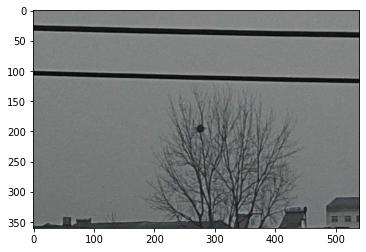

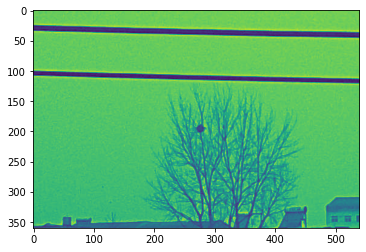

In [14]:
original_image = cv2.imread(test_images[0])
x = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)


plt.imshow(original_image)
plt.show()
plt.imshow(x)
plt.show()

In [15]:
h, w = x.shape

x = cv2.resize(x, (128, 128))
x = x/255.0
x = x.astype(np.float32)

x = np.expand_dims(x, axis=0)


In [16]:
pred_mask = model.predict(x)[0]

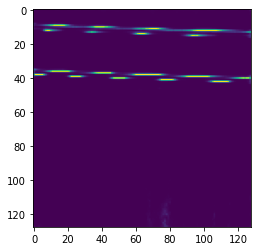

In [17]:
plt.imshow(pred_mask)
plt.show()

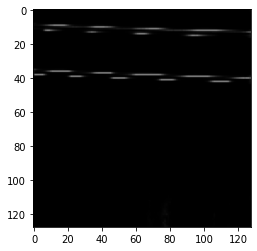

In [18]:
pred_mask = np.concatenate(
    [
        pred_mask,
        pred_mask,
        pred_mask
    ], axis=2)
plt.imshow(pred_mask)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


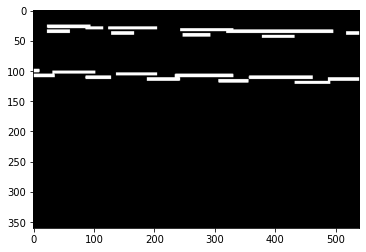

In [19]:
pred_mask = (pred_mask > 0.1) * 255
pred_mask = pred_mask.astype(np.float32)
pred_mask = cv2.resize(pred_mask, (w, h))

plt.imshow(pred_mask)
plt.show()

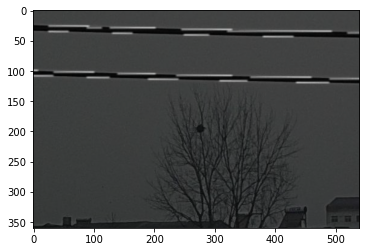

In [21]:
original_image = original_image.astype(np.uint8)
pred_mask = pred_mask.astype(np.uint8)

alpha = 0.6

original_image2 = cv2.addWeighted(pred_mask, 0.5, original_image, 0.5, 0.0)


plt.imshow(original_image2,vmin=0,vmax=255)
plt.show()

In [22]:

name = path.split("\\")[-1]
print(name)
cv2.imwrite(f"save_images/{name}", original_image2)

NameError: name 'path' is not defined

In [77]:
for path in tqdm(test_images, total=1):
    original_image = cv2.imread(path)
    x = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
 #   x = np.expand_dims(x, axis=0)
   # print(x.shape)
    
    h, w = x.shape

    x = cv2.resize(x, (128, 128))
    x = x/255.0
    x = x.astype(np.float32)

    x = np.expand_dims(x, axis=0)
    #print("x2",x.shape)

    pred_mask = model.predict(x)[0]
    #print("pred",pred_mask.shape)
    pred_mask = np.concatenate(
        [
            pred_mask,
            pred_mask,
            pred_mask
        ], axis=2)
 

    pred_mask = (pred_mask > 0.5) * 255
    pred_mask = pred_mask.astype(np.float32)
    pred_mask = cv2.resize(pred_mask, (w, h))

    pred_mask = pred_mask.astype(np.uint8)
    original_image = original_image.astype(np.uint8)

    alpha = 0.6

    original_image2 = cv2.addWeighted(pred_mask, alpha, original_image, 1-alpha, 0)

    name = path.split("\\")[-1]
    cv2.imwrite(f"save_images/{name}", original_image2)



10it [00:02,  4.83it/s]                      
